<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Открытие-файла-с-данными" data-toc-modified-id="Открытие-файла-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие файла с данными</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Предварительные-выводы" data-toc-modified-id="Предварительные-выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Предварительные выводы</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Кодирование" data-toc-modified-id="Кодирование-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кодирование</a></span></li><li><span><a href="#Разделение-выборок" data-toc-modified-id="Разделение-выборок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разделение выборок</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Информационная безопасность

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
import optuna
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

##  Открытие файла с данными

In [2]:
df=pd.read_csv(r'network_traffic_data.csv', sep=',')
pd.set_option('display.max_columns', None)

## EDA

In [3]:
df['Label'].unique()

array(['BENIGN', 'PortScan', 'DoS Hulk', 'DDoS', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS GoldenEye', 'Heartbleed'],
      dtype=object)

In [4]:
def evaluation(data): #Функция для вывода общей информации о таблице: статистика, пропуски, дубликаты и т.д.
    information=(display('ИНФОРМАЦИЯ О ДАННЫХ',data.head(10)), display(data.info()), display('СТАТИСТИКА',data.describe()), display(data.describe(include=['object', 'bool'])), display('ЗАВИСИМОСТЬ ПРИЗНАКОВ',data.corr()), display('ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ',data.isna().mean()*100), display('ДУБЛИКАТЫ',data.duplicated().sum()))
    return information

evaluation(df)      

'ИНФОРМАЦИЯ О ДАННЫХ'

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,0,0,0.0,0.0,2.189751,0.729917,1.826691e+06,3.131700e+06,5442804,101,5480074,2740037.000,3.822290e+06,5442804,37270,0,0.000,0.00,0,0,0,0,0,0,72,32,0.547438,0.182479,0,6,2.40,3.287,10.80000,0,0,0,1,0,0,0,0,0,3.00,4.000,0.0,72,0,0,0,0,0,0,3,12,1,0,8192,42780,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,1448,0,395.0,587.5,6535.323473,26.686255,3.955428e+04,5.015462e+04,120501,1,616301,77037.625,7.299598e+04,215614,230,616874,68541.555,71985.97,199836,1,0,0,0,0,296,328,12.640858,14.045398,0,1448,232.60,442.800,196012.66000,0,0,0,1,0,0,0,0,1,244.90,78.100,395.0,296,0,0,0,0,0,0,9,703,10,3950,29200,252,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,112,112,112.0,0.0,1981.772904,26.075959,5.113267e+04,8.855831e+04,153391,3,3,3.000,0.000000e+00,3,3,4,4.000,0.00,4,4,0,0,0,0,40,40,13.037980,13.037980,40,112,68.80,39.440,1555.20000,0,0,0,0,0,0,0,0,1,86.00,40.000,112.0,40,0,0,0,0,0,0,2,80,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,128,128,128.0,0.0,3017.689906,34.686091,5.766000e+04,0.000000e+00,57660,57660,0,0.000,0.000000e+00,0,0,0,0.000,0.00,0,0,0,0,0,0,20,20,17.343046,17.343046,46,128,73.30,47.340,2241.33330,0,0,0,0,0,0,0,0,1,110.00,46.000,128.0,20,0,0,0,0,0,0,1,46,1,128,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,6,6,6.0,0.0,63885.267280,5215.123859,2.556667e+02,3.942896e+02,710,3,713,356.500,4.999245e+02,710,3,0,0.000,0.00,0,0,0,0,0,0,60,20,3911.342800,1303.781000,6,31,11.00,11.180,125.00000,0,0,0,0,1,0,0,0,0,13.75,14.336,6.0,60,0,0,0,0,0,0,3,43,1,6,1017,0,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,47210,3,2,0,0,0,0,0,0.000,0.000,0,0,0.0,0.0,0.000000,666666.666700,3.000000e+00,0.000000e+00,3,3,3,3.000,0.000000e+00,3,3,0,0.000,0.00,0,0,0,0,0,0,64,0,666666.700000,0.000000,0,0,0.00,0.000,0.00000,0,0,0,0,1,0,0,0,0,0.00,0.000,0.0,64,0,0,0,0,0,0,2,0,0,0,361,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,53,111373,4,2,168,116,42,42,42.000,0.000,58,58,58.0,0.0,2549.989674,53.873021,2.227460e+04,3.493425e+04,79780,3,31590,10530.000,1.823330e+04,31584,3,3,3.000,0.00,3,3,0,0,0,0,104,64,35.915348,17.957674,42,58,46.56,7.810,60.95238,0,0,0,0,0,0,0,0,0,54.34,42.000,58.0,104,0,0,0,0,0,0,4,168,2,116,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,443,65786373,122,191,23544,275883,1093,0,193.000,366.200,4380,0,1444.0,689.0,4551.504914,4.757824,2.108538e+05,2.919396e+06,51185854,1,65786373,543689.060,4.680394e+06,51185854,1,14585289,76764.680,484025.84,4827482,1,0,0,0,0,2464,3832,1.854487,2.903337,0,4380,953.50,846.000,715368.30000,0,0,0,1,0,0,0,0,1,956.50,193.000,1444.0,2464,0,0,0,0,0,0,122,23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             539616 non-null  int64  
 1    Flow Duration                539616 non-null  int64  
 2    Total Fwd Packets            539616 non-null  int64  
 3    Total Backward Packets       539616 non-null  int64  
 4   Total Length of Fwd Packets   539616 non-null  int64  
 5    Total Length of Bwd Packets  539616 non-null  int64  
 6    Fwd Packet Length Max        539616 non-null  int64  
 7    Fwd Packet Length Min        539616 non-null  int64  
 8    Fwd Packet Length Mean       539616 non-null  float64
 9    Fwd Packet Length Std        539616 non-null  float64
 10  Bwd Packet Length Max         539616 non-null  int64  
 11   Bwd Packet Length Min        539616 non-null  int64  
 12   Bwd Packet Length Mean       539616 non-nul

None

'СТАТИСТИКА'

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,539616.000000,5.396160e+05,539616.000000,539616.000000,5.396160e+05,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.391280e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.0,539616.000000,539616.0,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.396160e+05,539616.0,539616.0,539616.0,539616.0,539616.0,539616.0,539616.000000,5.396160e+05,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05
mean,5563.061394,2.106693e+07,6.119972,5.985495,4.082371e+02,7.999779e+03,169.449966,11.855382,44.681011,59.525095,1675.074384,23.508936,550.037006,697.306414,inf,inf,2.134902e+06,5.264535e+06,1.731840e+07,2.945584e+05,2.075634e+07,4.036797e+06,6.666492e+06,1.720041e+07,1.035760e+06,9.601754e+06,2.028745e+06,2.413091e+06,6.464188e+06,8.147788e+05,0.036747,0.0,0.000056,0.0,-4.593957e+03,-4.290450e+03,7.142149e+04,7.885307e+03,9.609552,1723.695630,276.581177,544.090932,1.112688e+06,0.062524,0.036747,0.000120,0.377765,0.365884,0.060567,0.000056,0.000120,0.643446,305.358765,44.681011,550.037006,-4.593957e+03,0.0,0.0,0.0,0.0,0.0,0.0,6.119972,4.082371e+02,5.985495,7.998768e+03,7564.762311,1277.937053,2.946516,-2.429314e+03,1.154984e+05,4.037570e+04,1.672882e+05,8.983017e+04,1.610155e+07,9.585649e+05,1.687227e+07,1.539150e+07
std,14921.262751,3.812172e+07,345.109317,463.490949,7.478351e+03,1.014442e+06,560.533869,60.961661,150.873880,217.729412,2843.534429,55.198582,869.702147,1255.312166,NaN,NaN,5.824585e+06,1.055110e+07,3.395701e+07,4.269410e+06,3.812106e+07,1.062759e+07,1.391409e+07,3.402154e+07,8.949951e+06,2.807218e+07,9.045625e+06,8.975673e+06,2.192197e+07,7.698887e+06,0.188139,0.0,0.007456,0.0,2.095355e+06,2.076610e+06,2.685287e+05,3.847268e+04,21.551058,2862.902929,416.169617,903.656284,2.468134e+06,0.242105,0.188139,0.010975,0.484829,0.481678,0.238535,0.007456,0.010975,0.634460,457.152955,150.873880,869.702147,2.095355e+06,0.0,0.0,0.0,0.0,0.0,0.0,345.109317,7.478351e+03,463.490949,1.013814e+06,13440.653528,6590.247532,267.510434,1.052329e+06,7.787530e+05,4.347032e+05,1.059626e+06,7.099710e+05,3.315463e+07,6.461275e+06,3.403851e+07,3.295695e+07

,Label
count,539616
unique,15
top,BENIGN
freq,240000


'ЗАВИСИМОСТЬ ПРИЗНАКОВ'

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.179121,-0.004491,-0.003684,0.011943,-0.002828,0.085761,-0.008278,0.125459,0.108413,-0.214457,-0.136617,-0.229458,-0.202710,0.051600,0.134902,-0.121178,-0.161277,-0.163455,-0.024395,-0.178130,-0.124486,-0.152334,-0.162901,-0.041088,-0.094308,-0.067617,-0.065644,-0.072323,-0.037574,0.172304,NaN,0.002093,NaN,0.000812,0.000763,0.119620,0.127860,-0.126997,-0.181713,-0.195265,-0.180555,-0.136426,-0.071855,0.172304,-0.003794,-0.079548,0.268264,0.460833,0.002093,-0.003794,0.084699,-0.194041,0.125459,-0.229458,0.000812,NaN,NaN,NaN,NaN,NaN,NaN,-0.004491,0.011943,-0.003684,-0.002829,-0.058264,0.198335,-0.003234,0.000855,-0.044212,-0.032972,-0.049732,-0.035651,-0.158890,-0.025703,-0.159201,-0.155937
Flow Duration,-0.179121,1.000000,0.018046,0.015152,0.052678,0.012175,0.253809,-0.090833,0.127411,0.240087,0.538502,-0.208027,0.541128,0.491307,-0.024902,-0.159573,0.582814,0.868611,0.905104,0.076640,0.999212,0.649654,0.857683,0.904951,0.178216,0.645645,0.399011,0.494443,0.536120,0.180131,-0.031228,NaN,-0.004121,NaN,-0.001384,-0.001203,-0.146983,-0.113261,-0.210294,0.545320,0.476888,0.491072,0.309376,0.334948,-0.031228,0.000787,-0.156692,0.181892,-0.115902,-0.004121,0.000787,-0.215864,0.455537,0.127411,0.541128,-0.001384,NaN,NaN,NaN,NaN,NaN,NaN,0.018046,0.052678,0.015152,0.012179,-0.077901,-0.039337,0.012132,-0.001428,0.191943,0.186125,0.242334,0.137895,0.883483,0.272722,0.902281,0.849129
Total Fwd Packets,-0.004491,0.018046,1.000000,0.999204,0.228154,0.998667,0.012555,-0.002313,0.002589,0.004294,0.013012,-0.004858,0.012059,0.004139,-0.000093,-0.003436,0.000039,0.001648,0.003704,-0.000806,0.017887,0.000024,0.002119,0.003623,-0.001356,0.022272,0.000480,0.001656,0.003797,-0.000567,0.001521,NaN,-0.000089,NaN,0.003419,0.004459,-0.003109,-0.002833,-0.005080,0.013217,0.014038,0.007134,0.002437,-0.000894,0.001521,0.002466,0.003734,0.001240,-0.003563,-0.000089,0.002466,-0.001469,0.012515,0.002589,0.012059,0.003419,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.228154,0.999204,0.998668,0.004996,0.000352,0.809370,-0.000011,0.014050,0.013113,0.017742,0.010058,0.003286,0.001856,0.003522,0.002994
Total Backward Packets,-0.003684,0.015152,0.999204,1.000000,0.219303,0.998956,0.011280,-0.001710,0.001912,0.003530,0.012323,-0.003577,0.011675,0.003607,-0.000149,-0.003555,-0.001008,0.000162,0.002089,-0.000888,0.014973,-0.000611,0.000721,0.001992,-0.001149,0.020931,-0.000123,0.001465,0.003796,-0.000861,0.001469,NaN,-0.000095,NaN,0.003417,0.004465,-0.003349,-0.002006,-0.004201,0.012469,0.014423,0.006900,0.002515,-0.000345,0.001469,0.001560,0.004533,-0.000745,-0.002429,-0.000095,0.001560,0.003872,0.012988,0.001912,0.011675,0.003417,NaN,NaN,NaN,NaN,NaN,NaN,0.999204,0.2193

'ПРОЦЕНТ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ'

 Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
Label                          0.0
Length: 79, dtype: float64

'ДУБЛИКАТЫ'

64601

(None, None, None, None, None, None, None)

In [5]:
#df = df.drop_duplicates()

**Так как названия многих колонок содежат пробелы (в том числе вначале), а также другие символы, переименую всё так, чтобы бы единый формат**

In [6]:
def format_column_names(data):
   
    # Приводим названия колонок к нижнему регистру
    data.columns = data.columns.str.lower()

 # Удаляем пробелы в начале и заменяем пробелы в середине и занк / на нижнее подчёркивание
    data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('/','_')
    
    return data

# Пример использования
df = format_column_names(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             539616 non-null  int64  
 1   flow_duration                539616 non-null  int64  
 2   total_fwd_packets            539616 non-null  int64  
 3   total_backward_packets       539616 non-null  int64  
 4   total_length_of_fwd_packets  539616 non-null  int64  
 5   total_length_of_bwd_packets  539616 non-null  int64  
 6   fwd_packet_length_max        539616 non-null  int64  
 7   fwd_packet_length_min        539616 non-null  int64  
 8   fwd_packet_length_mean       539616 non-null  float64
 9   fwd_packet_length_std        539616 non-null  float64
 10  bwd_packet_length_max        539616 non-null  int64  
 11  bwd_packet_length_min        539616 non-null  int64  
 12  bwd_packet_length_mean       539616 non-null  float64
 13 

### Удаление пропусков

**Заполню пропуски значениями, сохраняющими нормальное распределение**

In [8]:
df=df.interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   destination_port             539616 non-null  int64  
 1   flow_duration                539616 non-null  int64  
 2   total_fwd_packets            539616 non-null  int64  
 3   total_backward_packets       539616 non-null  int64  
 4   total_length_of_fwd_packets  539616 non-null  int64  
 5   total_length_of_bwd_packets  539616 non-null  int64  
 6   fwd_packet_length_max        539616 non-null  int64  
 7   fwd_packet_length_min        539616 non-null  int64  
 8   fwd_packet_length_mean       539616 non-null  float64
 9   fwd_packet_length_std        539616 non-null  float64
 10  bwd_packet_length_max        539616 non-null  int64  
 11  bwd_packet_length_min        539616 non-null  int64  
 12  bwd_packet_length_mean       539616 non-null  float64
 13 

### Визуализация

**Оценка распределения**

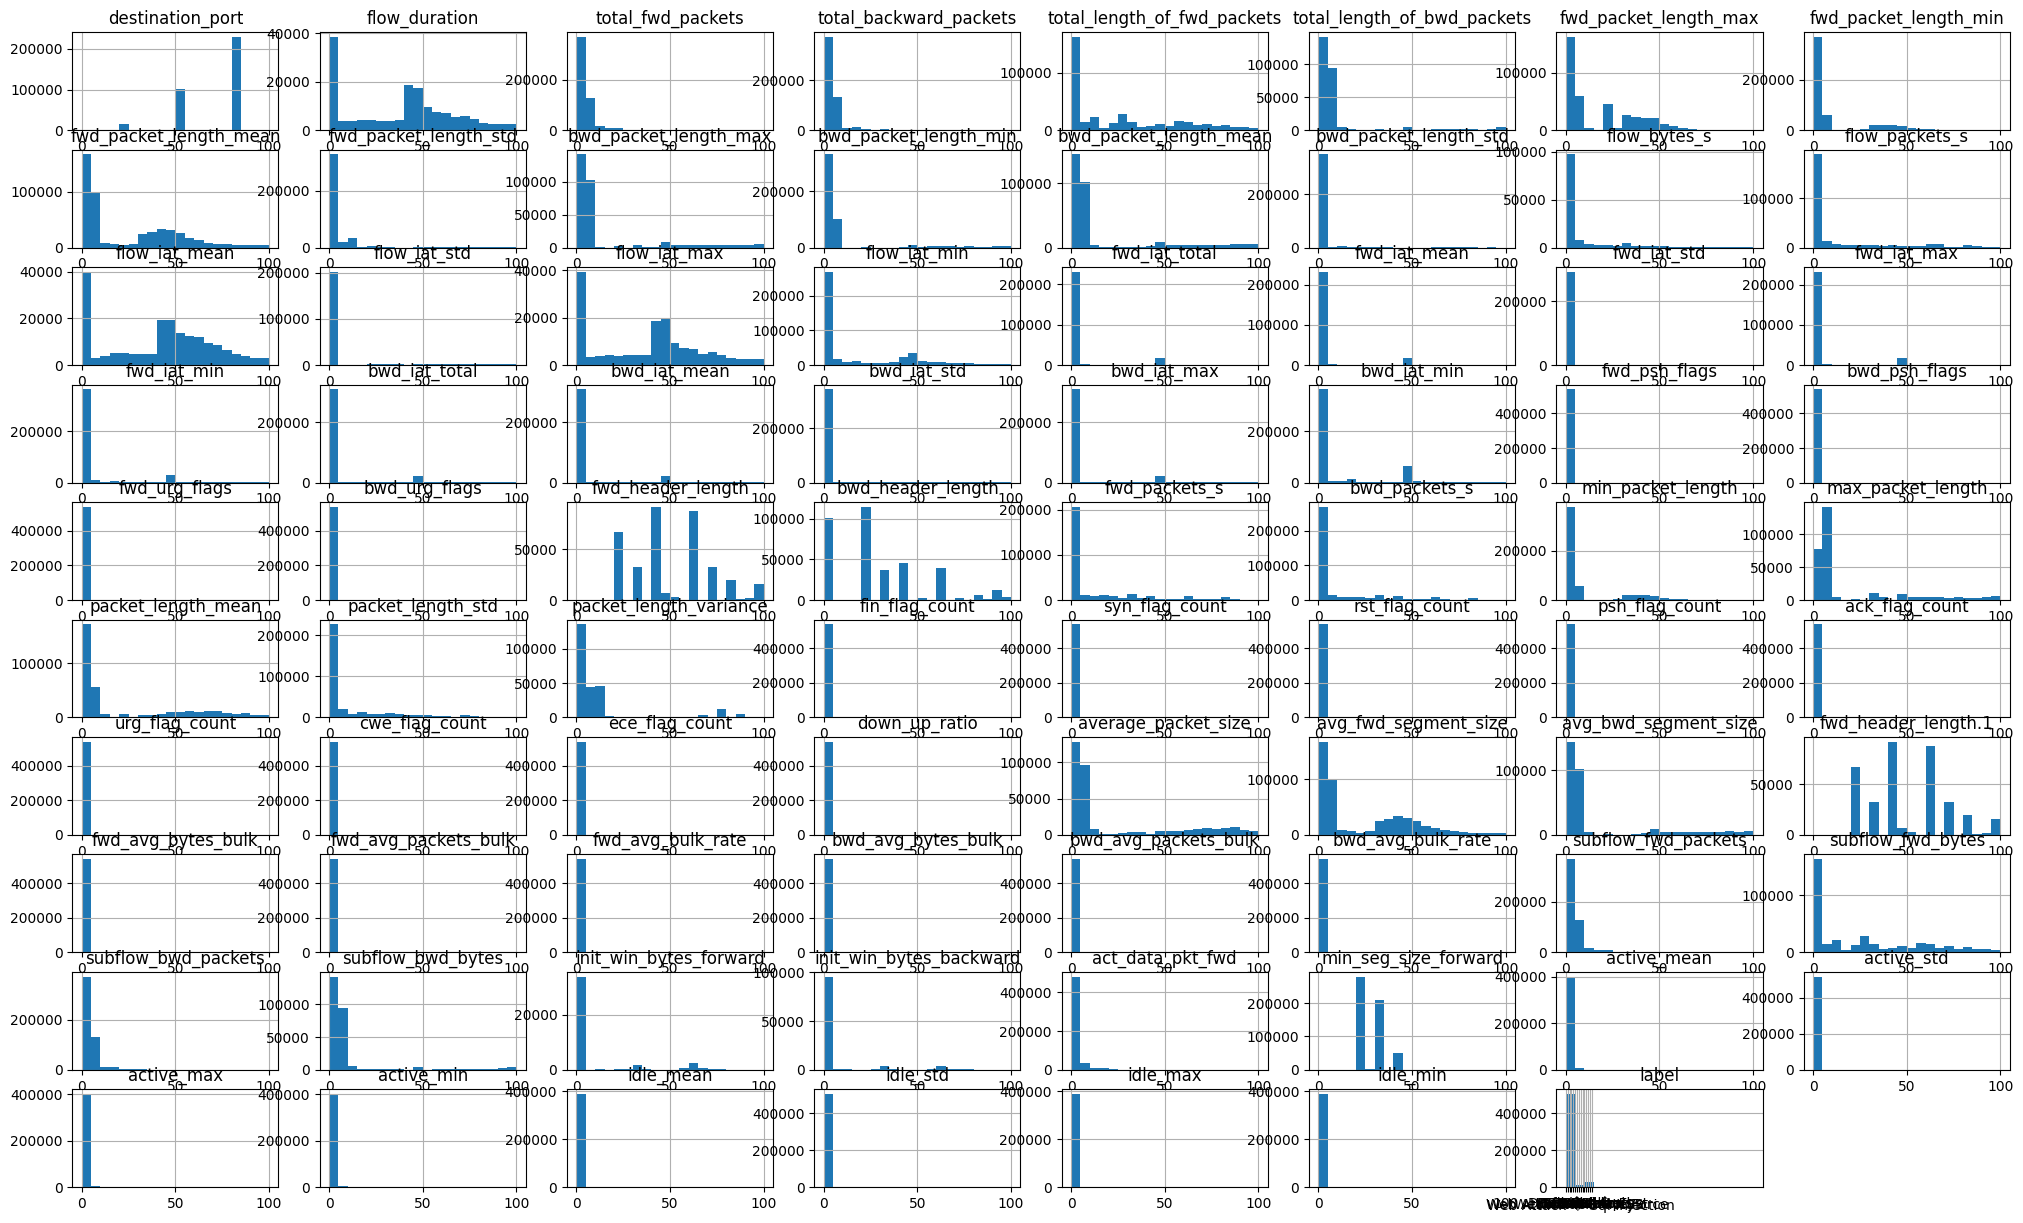

In [9]:
plt.figure(figsize=(25, 15))


for column in df.columns:
    plt.subplot(10, 8, df.columns.get_loc(column) + 1) 
    df[column].hist(bins=20, range=(0, 100)) 
    plt.title(column)

plt.show()

**Оценка выбросов**

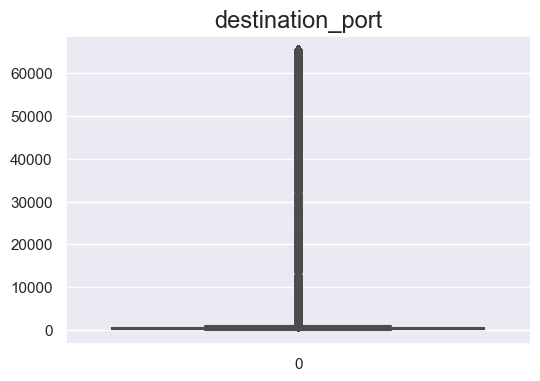

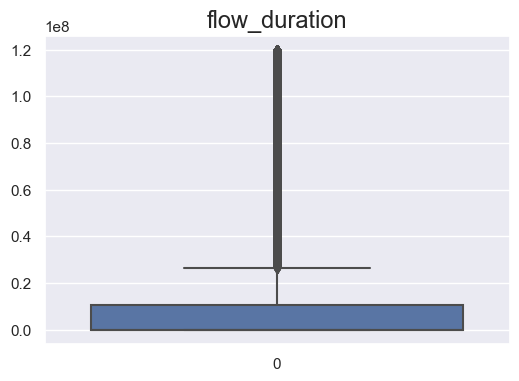

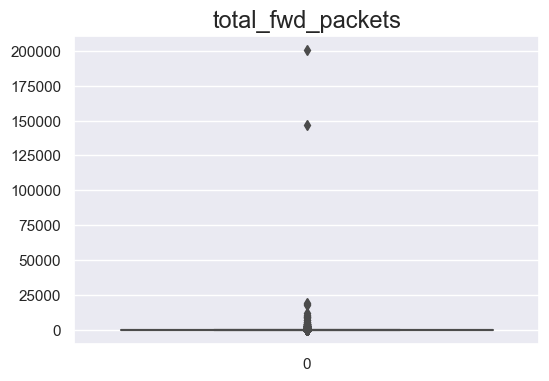

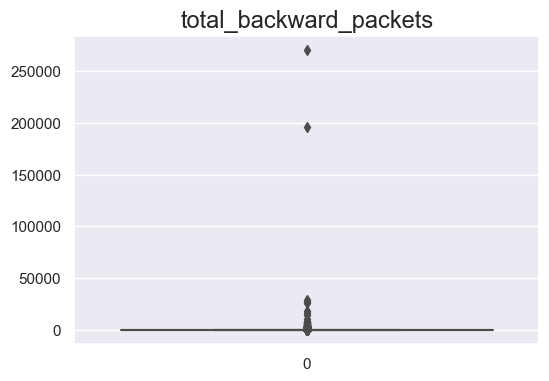

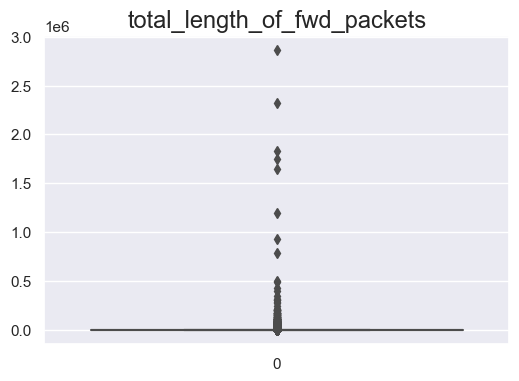

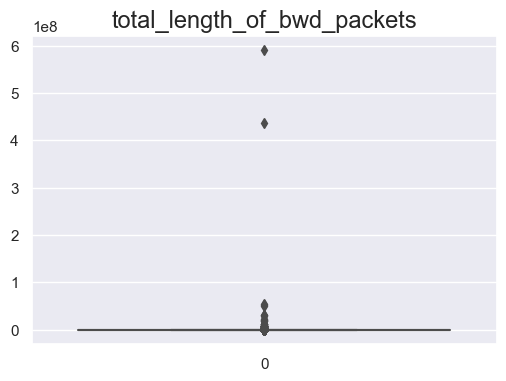

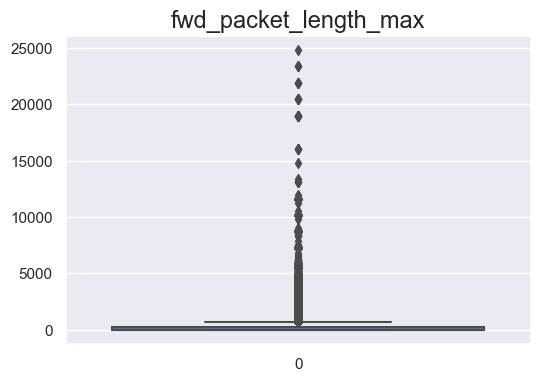

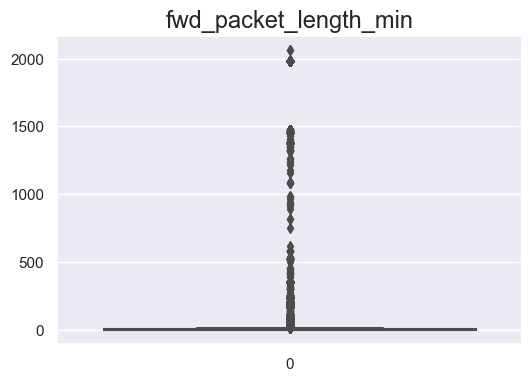

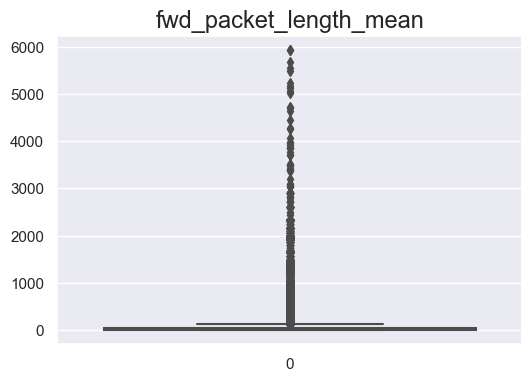

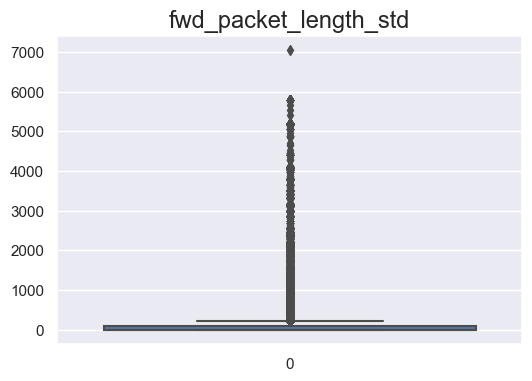

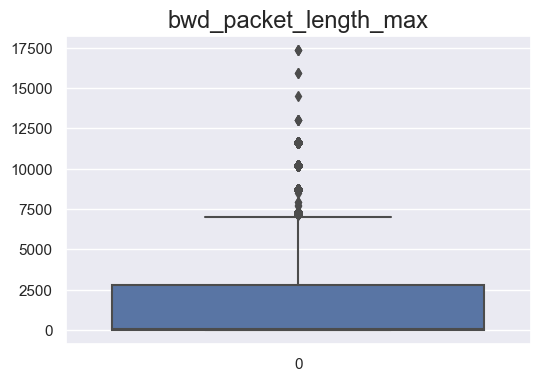

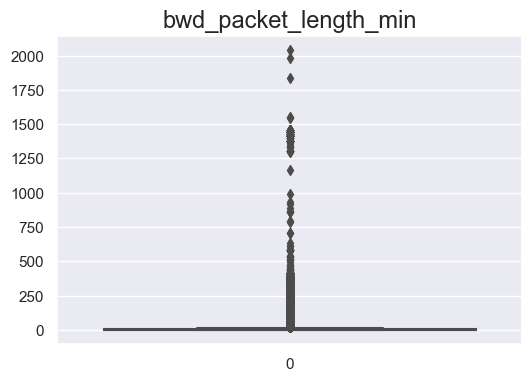

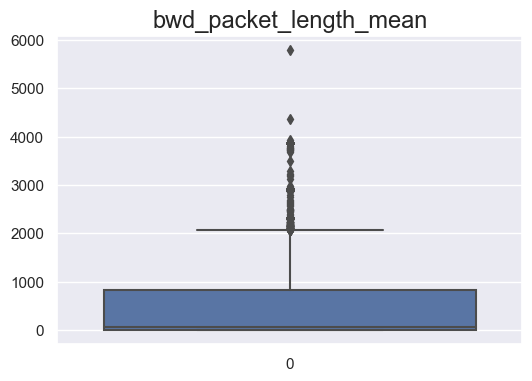

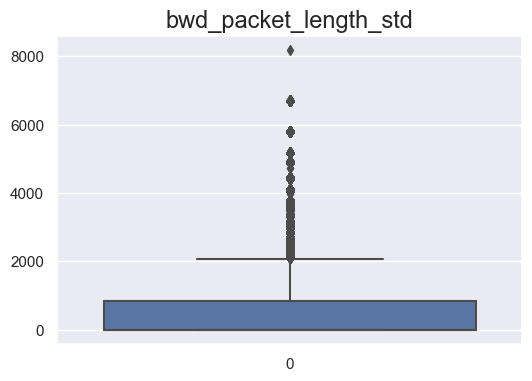

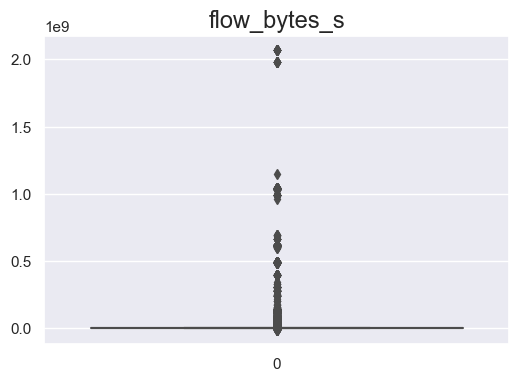

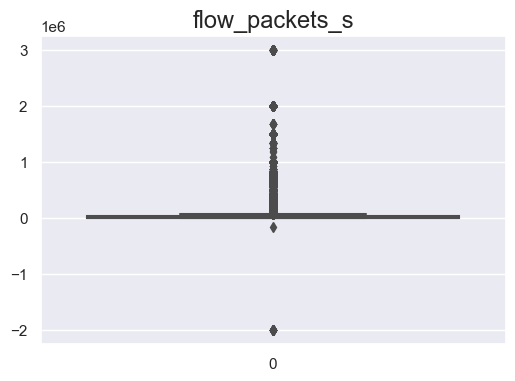

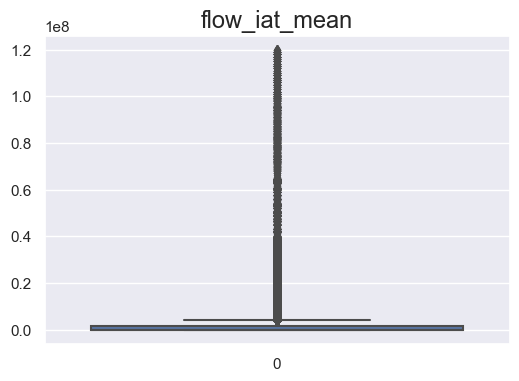

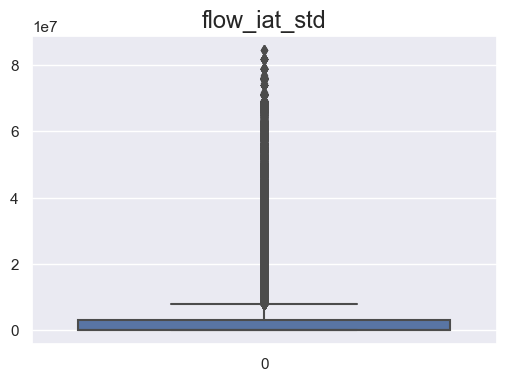

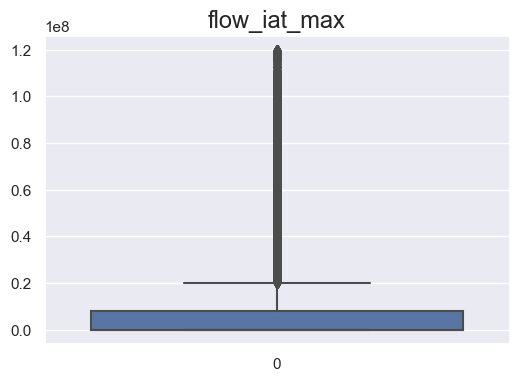

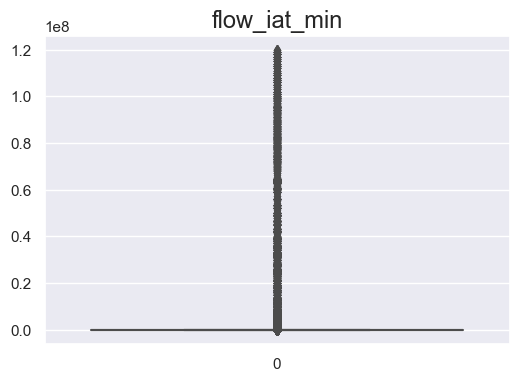

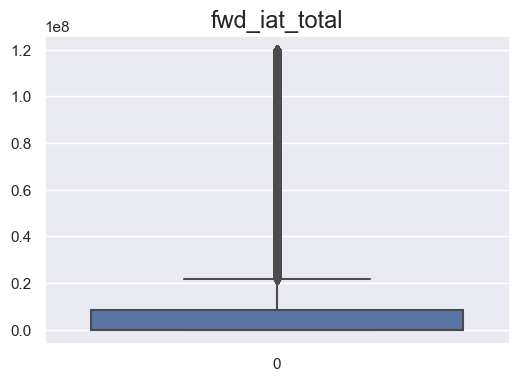

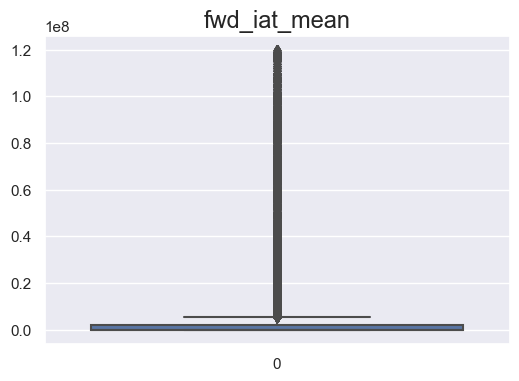

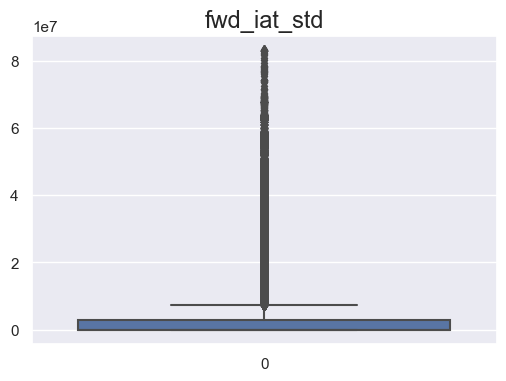

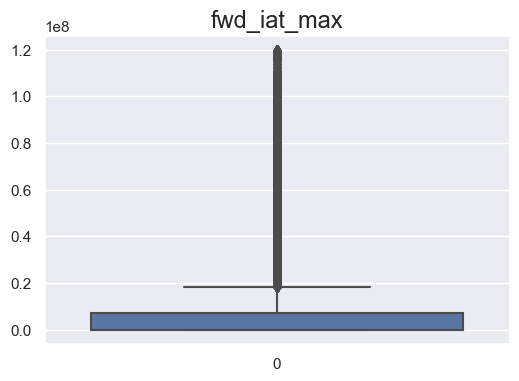

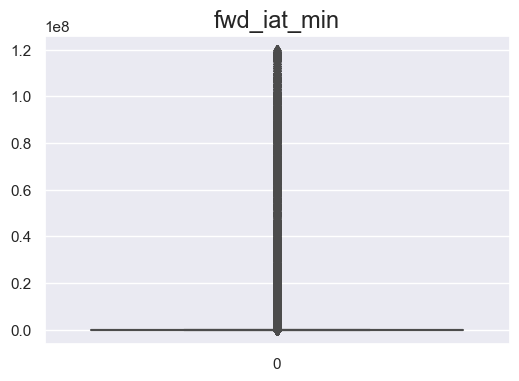

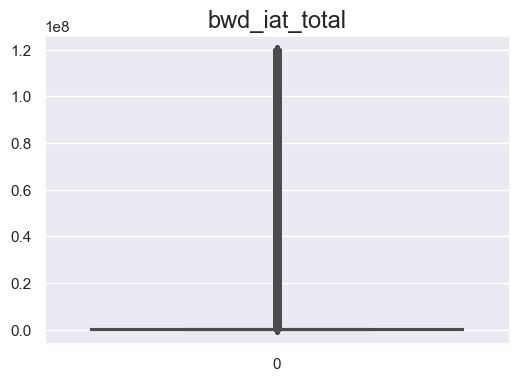

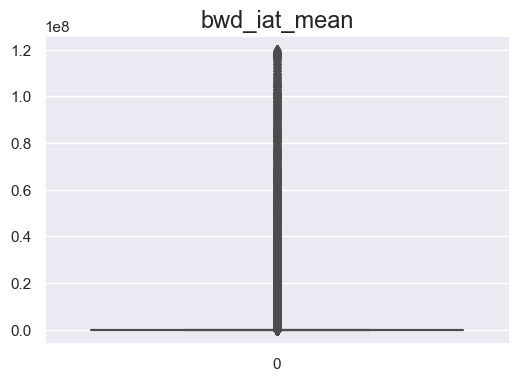

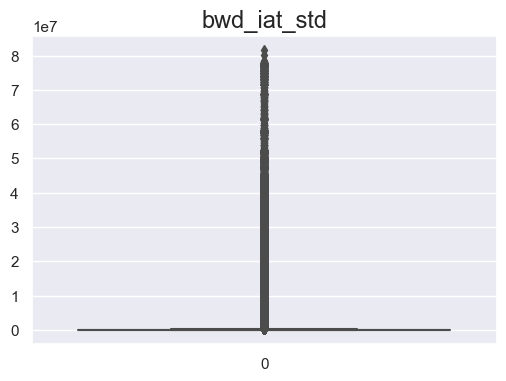

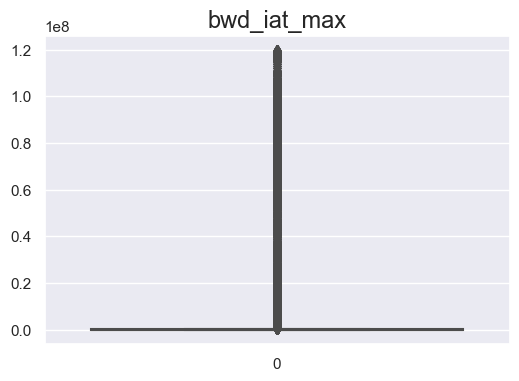

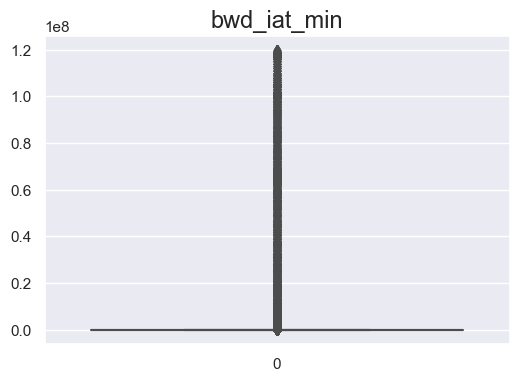

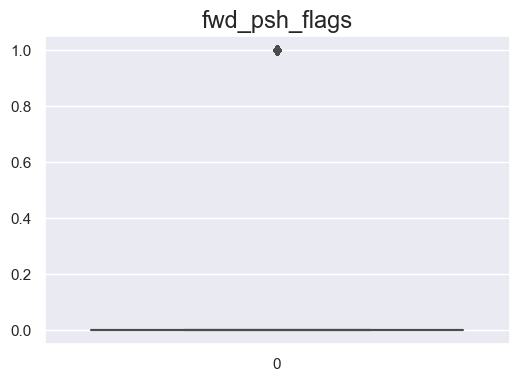

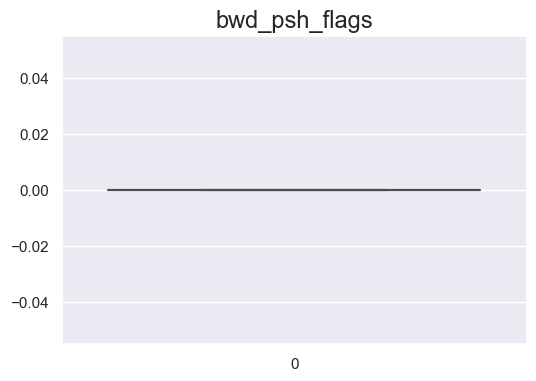

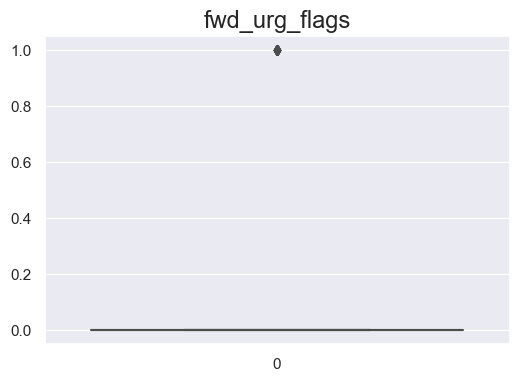

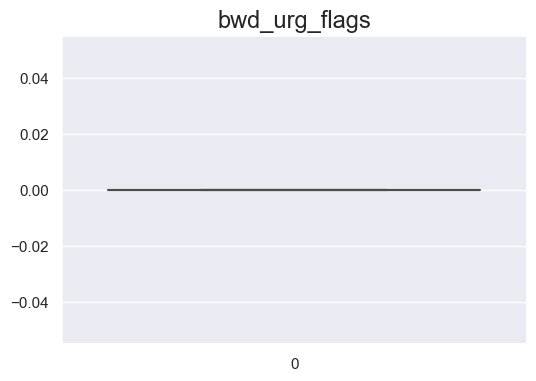

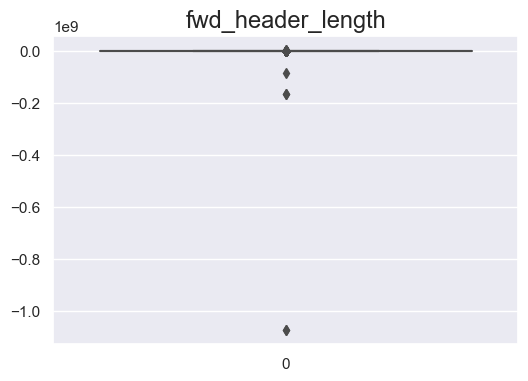

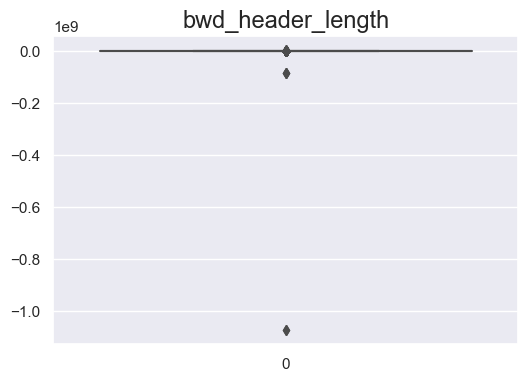

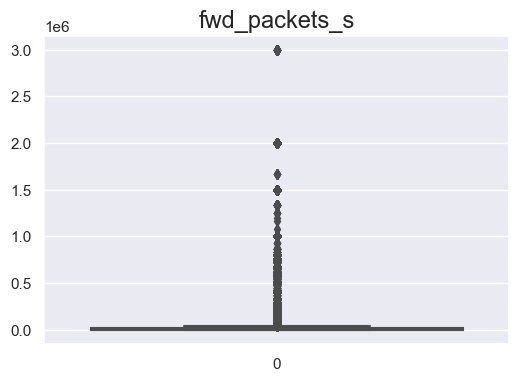

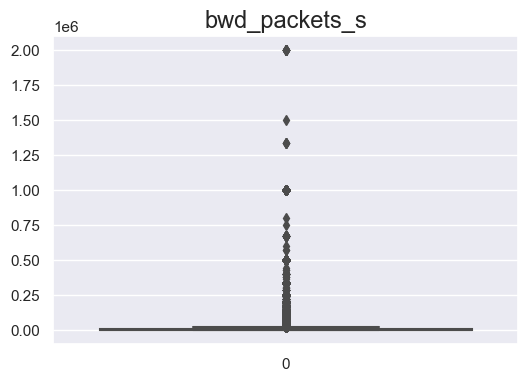

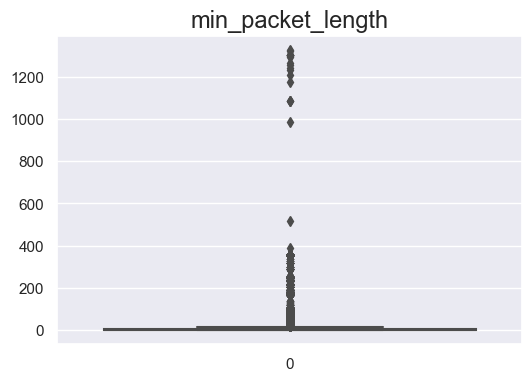

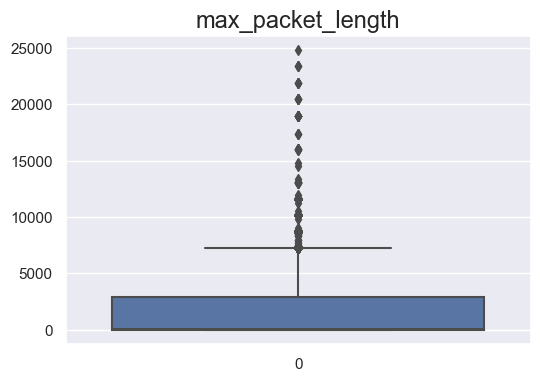

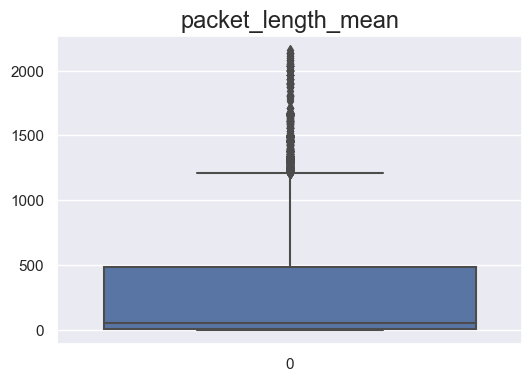

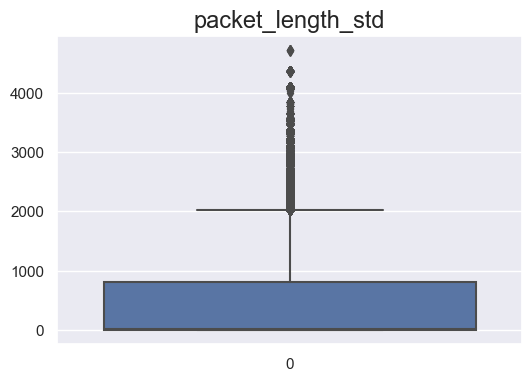

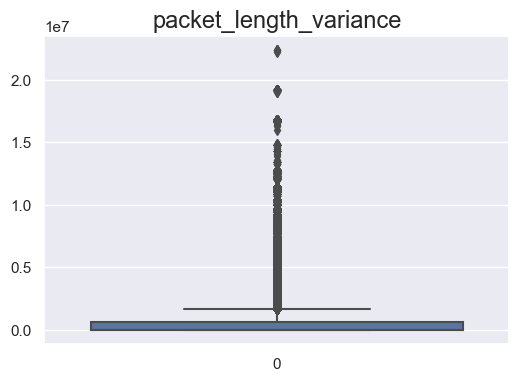

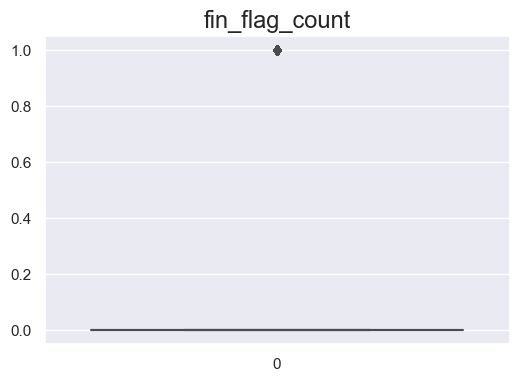

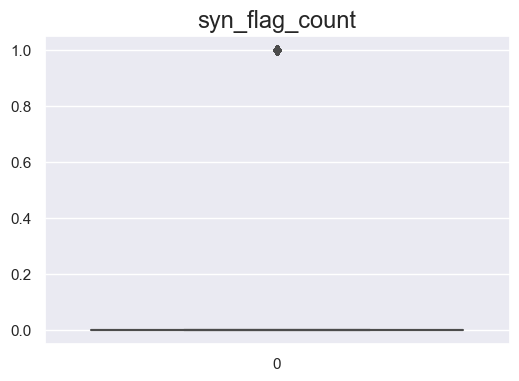

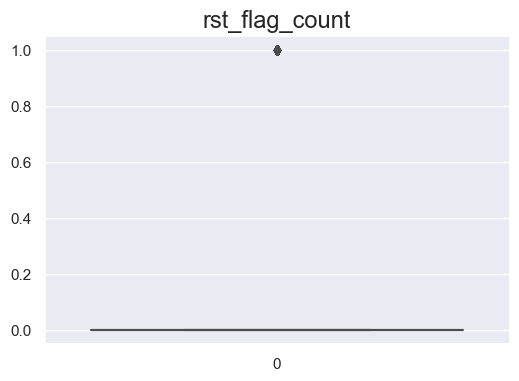

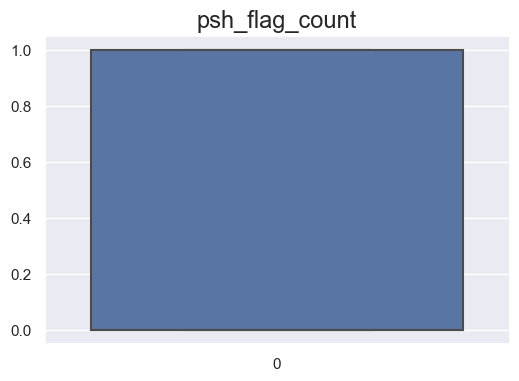

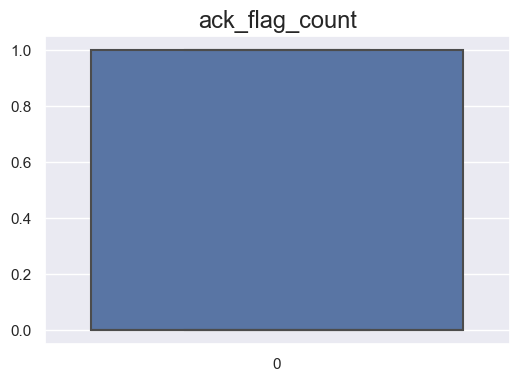

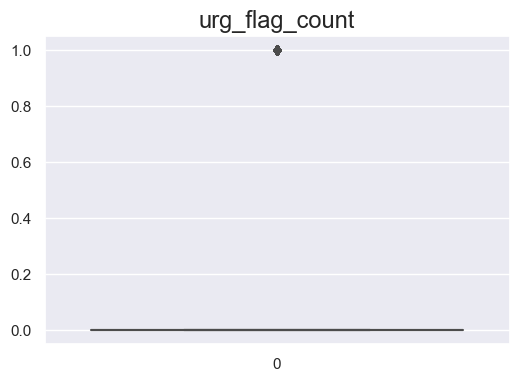

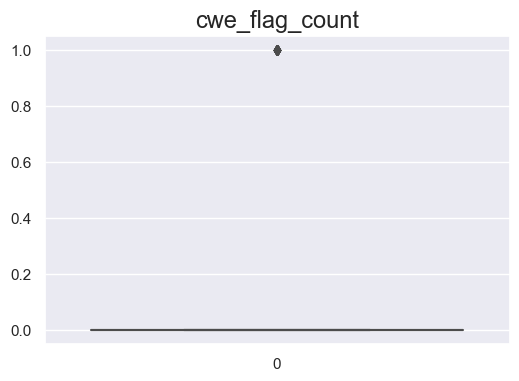

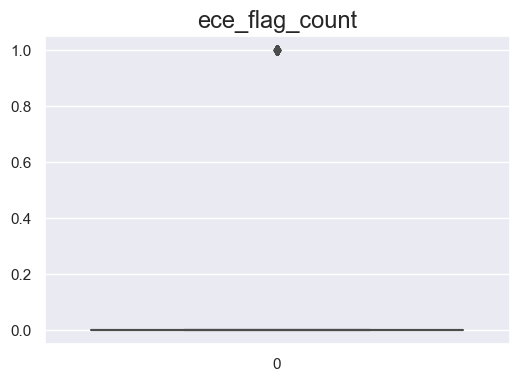

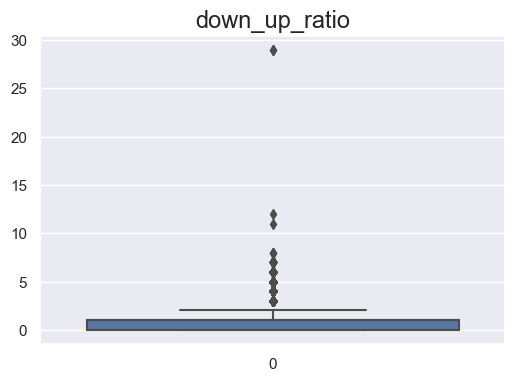

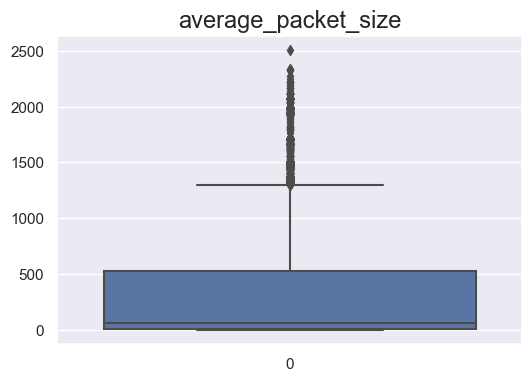

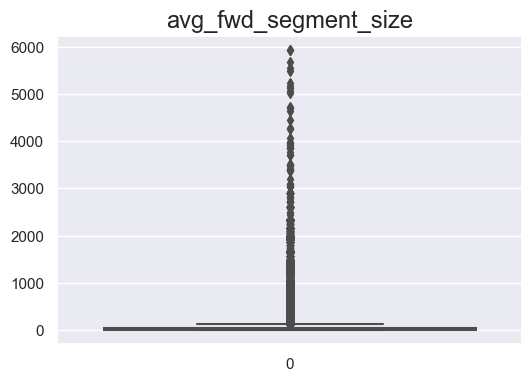

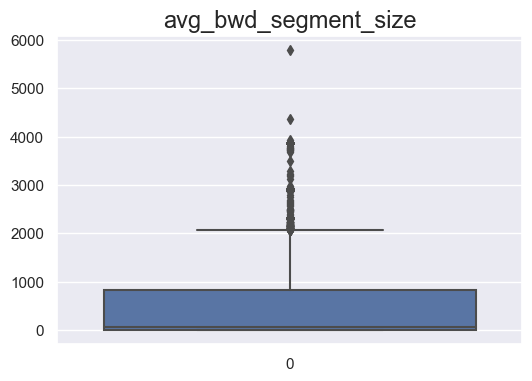

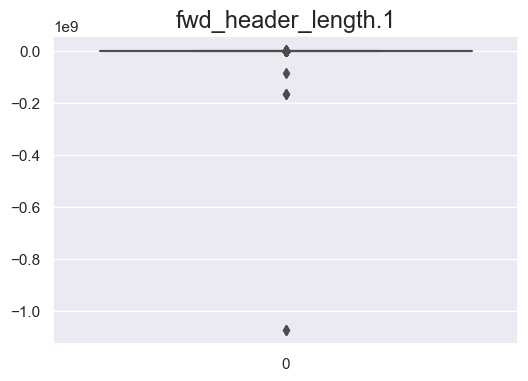

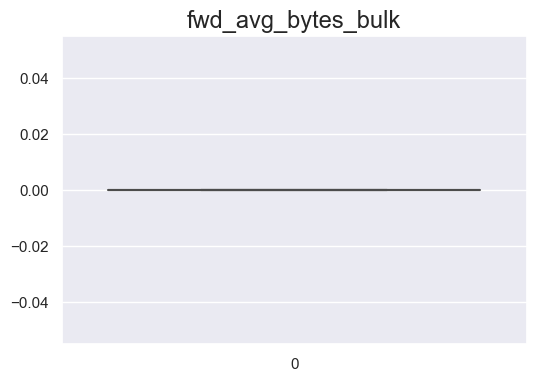

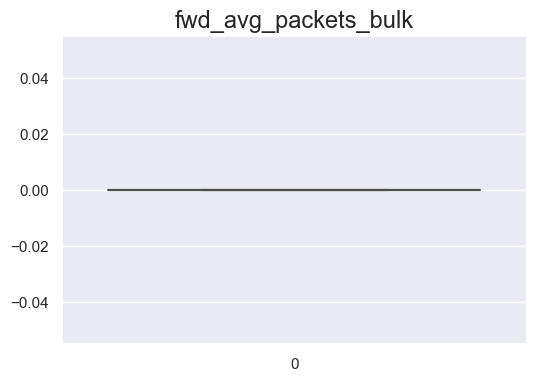

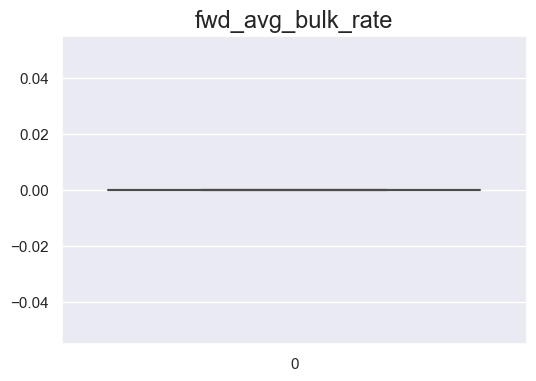

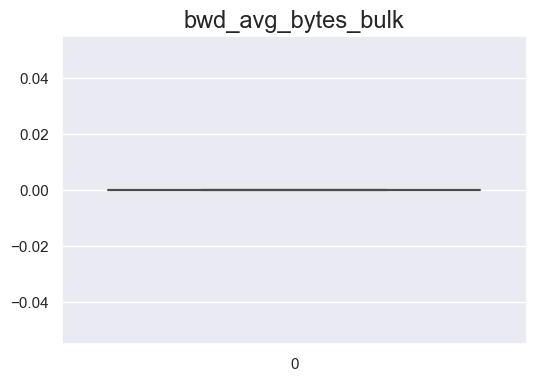

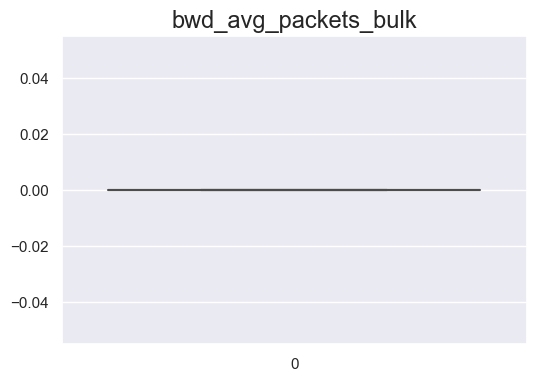

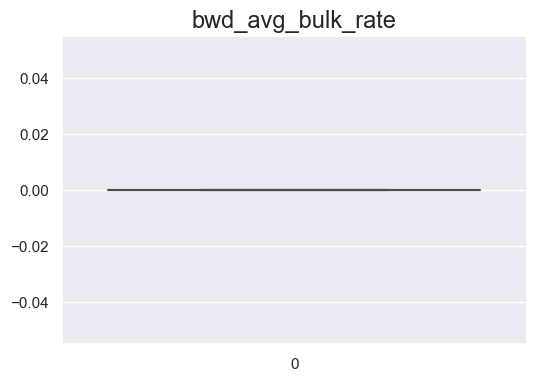

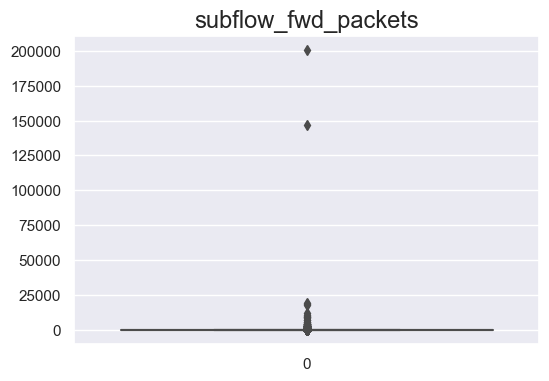

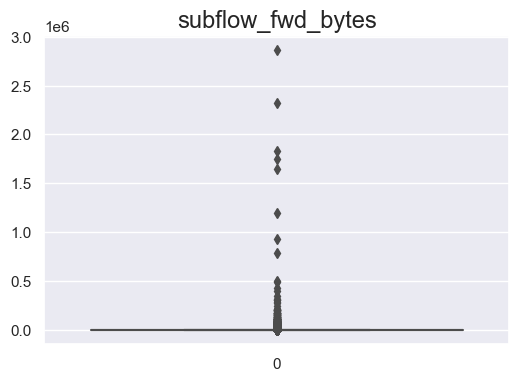

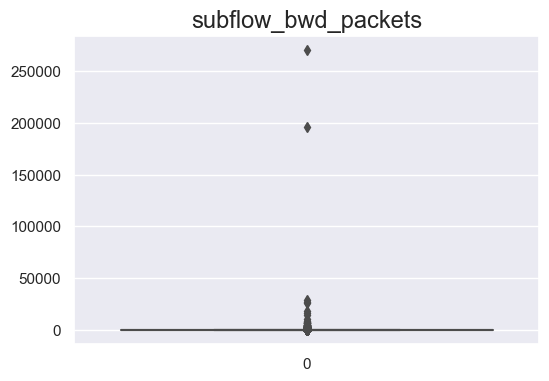

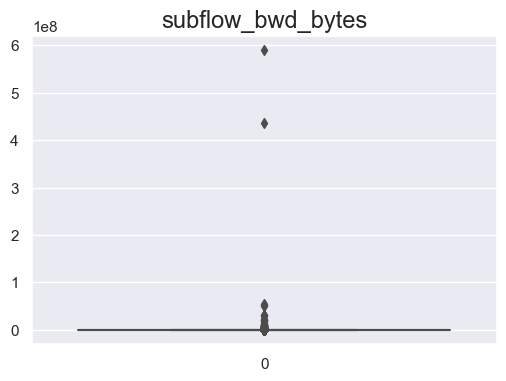

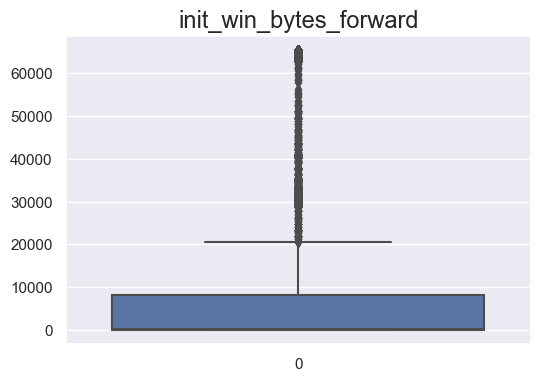

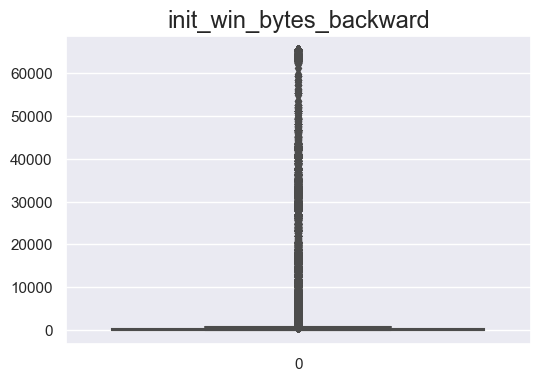

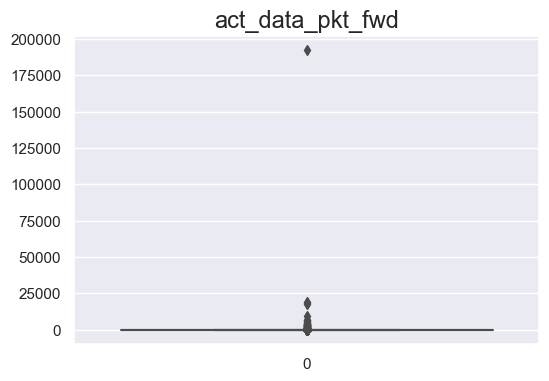

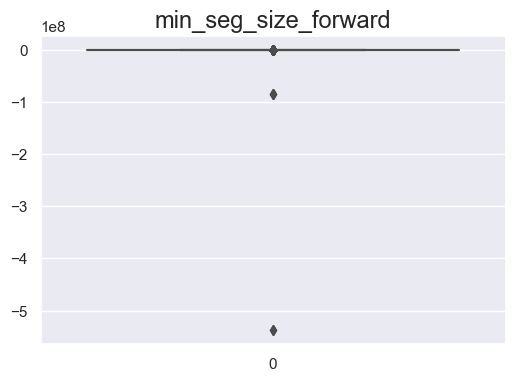

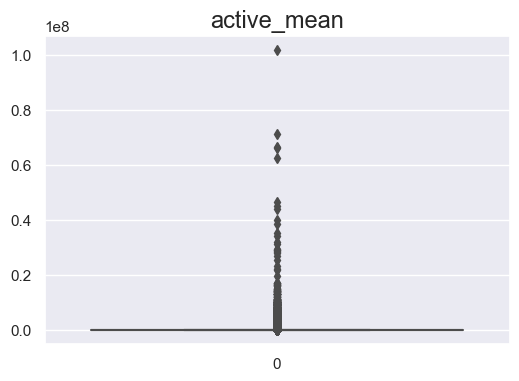

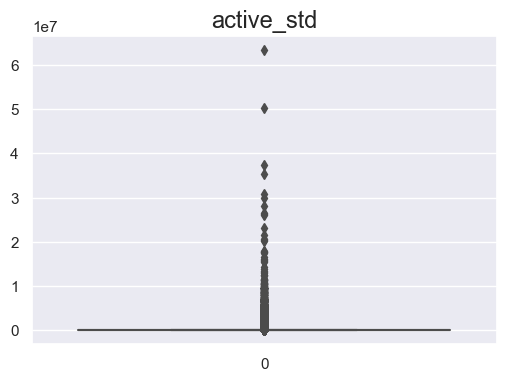

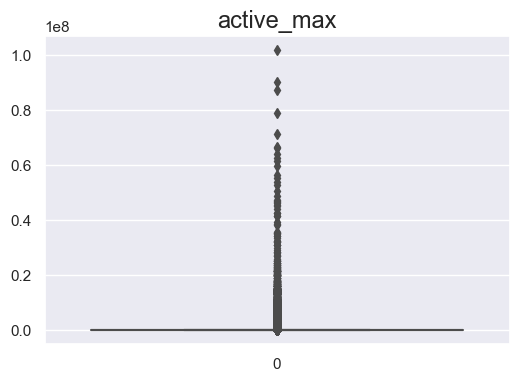

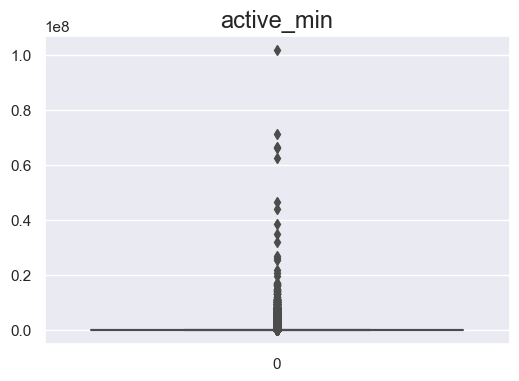

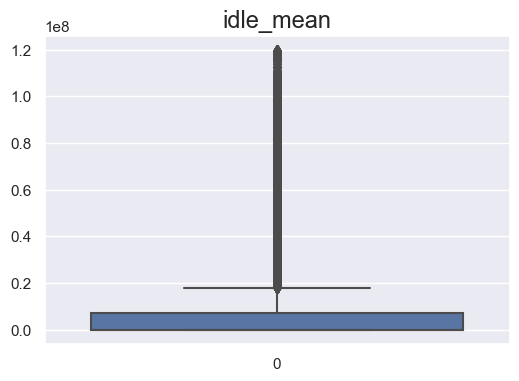

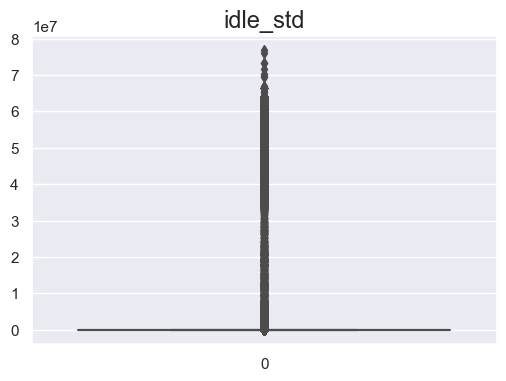

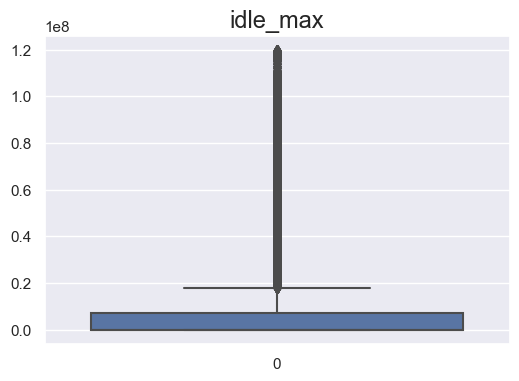

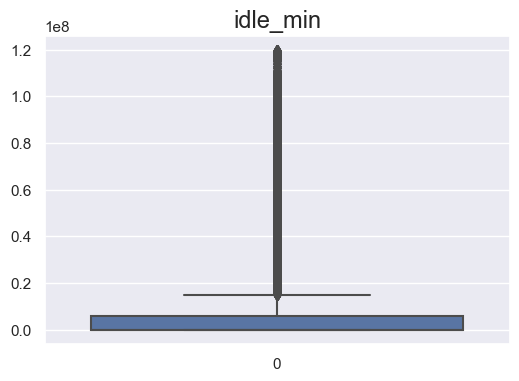

In [10]:
for col in df:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        sb.set(rc={'figure.figsize': (6, 4)})
        sb.boxplot(df[col])
        plt.title(f'{col}', fontsize=17)
        plt.show()

**Оценка баланса классов**

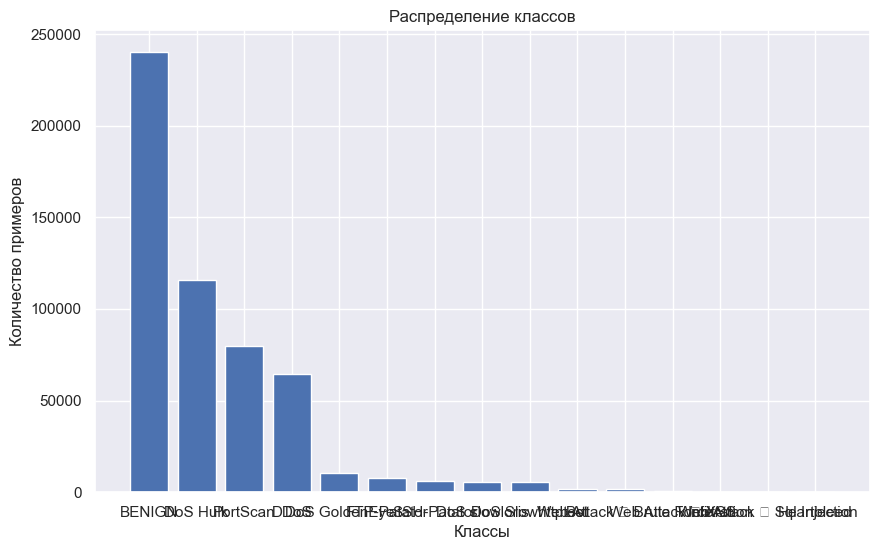

In [11]:
class_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Классы')
plt.ylabel('Количество примеров')
plt.title('Распределение классов')
plt.show()


### Предварительные выводы

1. Данные содержат 78 признаков и целевую переменную. Размер данных более 500 тыс. строк.
2. В данных были пропущенные значения, которые заполнила с помощью функции interpolate()
3. Данные содержали дубликаты, которые были удалены с помощью drop_duplicates()
4. Судя по графикам, распределение данных ненормальное, есть много аномальных значений. Удалять выбросы не стала, потому что не знаю природу данных.
5. Классы целевой переменной не сбалансированы. Это надо учесть при моделировании.

## Моделирование

### Кодирование

**Так как целевая переменная категориальная - закодирую её. Но использую OrdinalEncoder(), чтобы не создавать лишние столбцы**

In [12]:
# OrdinalEncoder
data_encoder=df.copy()

encoder = OrdinalEncoder()
data_encoder[['label']]=encoder.fit_transform(df[['label']])

data_encoder['label'] = data_encoder['label'].astype('int64')


data_encoder.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length.1,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,0,0,0.0,0.0,2.189751,0.729917,1.826691e+06,3.131700e+06,5442804,101,5480074,2740037.000,3.822290e+06,5442804,37270,0,0.000,0.00,0,0,0,0,0,0,72,32,0.547438,0.182479,0,6,2.4,3.287,10.8000,0,0,0,1,0,0,0,0,0,3.00,4.000,0.0,72,0,0,0,0,0,0,3,12,1,0,8192,42780,2,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,443,711977,9,10,703,3950,267,0,78.100,103.300,1448,0,395.0,587.5,6535.323473,26.686255,3.955428e+04,5.015462e+04,120501,1,616301,77037.625,7.299598e+04,215614,230,616874,68541.555,71985.97,199836,1,0,0,0,0,296,328,12.640858,14.045398,0,1448,232.6,442.800,196012.6600,0,0,0,1,0,0,0,0,1,244.90,78.100,395.0,296,0,0,0,0,0,0,9,703,10,3950,29200,252,4,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,53,153398,2,2,80,224,40,40,40.000,0.000,112,112,112.0,0.0,1981.772904,26.075959,5.113267e+04,8.855831e+04,153391,3,3,3.000,0.000000e+00,3,3,4,4.000,0.00,4,4,0,0,0,0,40,40,13.037980,13.037980,40,112,68.8,39.440,1555.2000,0,0,0,0,0,0,0,0,1,86.00,40.000,112.0,40,0,0,0,0,0,0,2,80,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,53,57660,1,1,46,128,46,46,46.000,0.000,128,128,128.0,0.0,3017.689906,34.686091,5.766000e+04,0.000000e+00,57660,57660,0,0.000,0.000000e+00,0,0,0,0.000,0.00,0,0,0,0,0,0,20,20,17.343046,17.343046,46,128,73.3,47.340,2241.3333,0,0,0,0,0,0,0,0,1,110.00,46.000,128.0,20,0,0,0,0,0,0,1,46,1,128,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,8446,767,3,1,43,6,31,6,14.336,14.440,6,6,6.0,0.0,63885.267280,5215.123859,2.556667e+02,3.942896e+02,710,3,713,356.500,4.999245e+02,710,3,0,0.000,0.00,0,0,0,0,0,0,60,20,3911.342800,1303.781000,6,31,11.0,11.180,125.0000,0,0,0,0,1,0,0,0,0,13.75,14.336,6.0,60,0,0,0,0,0,0,3,43,1,6,1017,0,2,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [13]:
data_encoder['label'].unique()

array([ 0, 10,  4,  2,  1,  9, 12, 14, 13,  7, 11,  6,  5,  3,  8],
      dtype=int64)

In [14]:
data_encoder = data_encoder.drop_duplicates()# удаление возможых дубликатов после кодирования

### Разделение выборок

In [15]:
train, test=train_test_split(data_encoder, test_size=0.20, random_state=12345)
display('Размер тренировочной выборки', train.shape)

display('Размер тестовой выборки', test.shape)

'Размер тренировочной выборки'

(380361, 79)

'Размер тестовой выборки'

(95091, 79)

In [16]:
# Выделение признаков выборок

x_train = train.drop('label', axis=1)
y_train = train['label']
 
x_test = test.drop('label', axis=1)
y_test = test['label']

### Подготовка данных

**В дынных есть слишком большие и аномальные значения. Так как далее буде масштабировать признаки, слишком большие и аномальные значения надо заменить. Я заменю так, чтобы сохранить распределение (другие методы негативно влияли на метрику). При удалении изменится размер выборок фичей и целевого признака.**

In [17]:
# Проверить наличие бесконечных значений (inf) в данных
is_inf_present = np.isinf(x_train).any().any()

# Проверить наличие слишком больших чисел в данных
is_large_value_present = (np.abs(x_train) > 1e12).any().any()

if is_inf_present or is_large_value_present:
    
    x_train = x_train.replace([np.inf, -np.inf], np.nan)
    x_train = x_train.interpolate()
    #fillna(x_train.mean())

In [18]:
is_inf_present = np.isinf(x_test).any().any()

is_large_value_present = (np.abs(x_test) > 1e12).any().any()

if is_inf_present or is_large_value_present:
    
    x_test = x_test.replace([np.inf, -np.inf], np.nan)
    x_test = x_test.interpolate()
    #fillna(0)

**Масштабирую признаки так как их значения и мера очень сильно отличаются. Проведя несколько эксперементов стало понятно, что без стандартизации модель (даже бустинг) работает плохо.**

In [19]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Конвертируйте массивы обратно в DataFrame
x_train_s = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_s = pd.DataFrame(x_test_scaled, columns=x_test.columns)


### Модель

**После разных эксперементов выбрана была одна модель - LGBM. Модель работает быстро и даёт хороший результат в сравнении с другими моделями.**

#### LGBMClassifier

In [20]:
params = {
    'objective': 'multiclass',
    'random_state': 12345,
    'num_class': 15,
    'num_leaves':29,
    #'boosting_type': 'gbdt',
    #'metric': 'multi_logloss',
    'max_depth': 9,
    #'n_estimators': 2000,
    'class_weight': 'balanced' 
}

model = lgb.LGBMClassifier(**params)
model.fit(x_train_s, y_train)

# Предсказания на тестовом наборе данных
y_pred = model.predict(x_test_s)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14438
[LightGBM] [Info] Number of data points in the train set: 380361, number of used features: 68
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.708050
[LightGBM] [Info] Start training from score -2.7080

In [21]:
# Вывод метрик 
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46792
           1       0.96      0.98      0.97       417
           2       1.00      1.00      1.00     12707
           3       1.00      1.00      1.00      2032
           4       1.00      1.00      1.00     17499
           5       1.00      0.99      0.99      1040
           6       0.99      1.00      0.99      1053
           7       1.00      1.00      1.00      1173
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00     11331
          11       1.00      1.00      1.00       623
          12       0.84      0.69      0.75       305
          13       1.00      0.80      0.89         5
          14       0.41      0.64      0.50       104

    accuracy                           1.00     95091
   macro avg       0.95      0.94      0.94     95091
we

## Выводы

**В результате работы модели были предсказаны с отличными показателями 11 классов, с хорошими показателями - 2 класса, 1 - удовлетворительно и 1 - хуже случайной оценки.**
*При подборе параметров модели очень существенно влияют на результат параметры num_leaves и max_depth. Изменение количества любого из них на 1 единицу снижает метрики в 3-5 раз по разным признакам. Без балансировки классов результат работы модели значительно хуже.*